In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import log_loss

import os
import pandas as pd 
import numpy as np
import multiprocessing # 여러 개의 일꾼 (cpu)들에게 작업을 분산시키는 역할
from multiprocessing import Pool 
from functools import partial # 함수가 받는 인자들 중 몇개를 고정 시켜서 새롭게 파생된 함수를 형성하는 역할
from data_loader import data_loader_v2 # 자체적으로 만든 data loader version 2.0 ([데이콘 15회 대회] 데이터 설명 및 데이터 불러오기 영상 참조)

from sklearn.ensemble import RandomForestClassifier
import joblib # 모델을 저장하고 불러오는 역
from datetime import datetime

import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm_notebook




In [13]:
train = joblib.load('data/df_train_10_120.pkl').reset_index()
test = joblib.load('data/df_test_10.pkl')

In [14]:
fea_cols = [c for c in train.columns if c[0] == 'V']
zero_cols = joblib.load('zero_cols.bin')
fea_cols = [c for c in fea_cols if c not in zero_cols]
len(fea_cols)

2755

In [15]:
model = joblib.load('model/20200201T120739_0.42070899280425217_0.03477196302416032.model')
model = joblib.load('model/20200204T125152_0_0.6866545643806307_0.3517946021430273.model')

In [16]:
importance_type = 'gain'
impt_dict = {k:v for k, v in zip(fea_cols, model.feature_importance(importance_type=importance_type))}

In [17]:
use_cols = []
for k, s in sorted(impt_dict.items(), key=(lambda x:x[1]), reverse=True):
    print(k, s)
    use_cols.append(k)

V3237 20291.523543244784
V3239 20192.698413379483
V3238 20146.162097905584
V3240 20124.97402707294
V4743 18892.283004248824
V4744 16829.91609729248
V4745 15824.581451375141
V4147 9800.917353330222
V2173 9225.059695148631
V4174 9005.292789243893
V4176 8675.621897027511
V2157 8674.39388247507
V4742 8573.804345978393
V4173 8420.282627075656
V4151 8396.817090252585
V4170 8376.710421370657
V3091 8234.551387521447
V4153 8166.904406565305
V4175 8138.56708984472
V4168 8134.677414800357
V2178 7591.174491041055
V2664 7363.789487432048
V2174 7049.064608276447
V4750 7030.657567515752
V2663 7003.84121062414
V4836 6927.199654746804
V4752 6565.282730413393
V4350 6562.300343976137
V4799 6046.125022685318
V4349 6026.467780006711
V0106 6018.101749142626
V2657 5851.8945103380875
V3802 5676.0441787627
V3801 5599.630446537802
V0110 5381.964650285602
V4339 5378.1077340356105
V2176 5373.226929199154
V0834 5228.084920858998
V0752 5197.691340657882
V2150 5158.998544771181
V4038 5133.784011412994
V4747 5132.406

V2921 0.0
V2923 0.0
V2925 0.0
V2928 0.0
V2931 0.0
V2932 0.0
V2936 0.0
V2937 0.0
V2938 0.0
V2940 0.0
V2944 0.0
V2946 0.0
V2947 0.0
V2948 0.0
V2949 0.0
V2951 0.0
V2952 0.0
V2953 0.0
V2955 0.0
V2957 0.0
V2960 0.0
V2962 0.0
V2963 0.0
V2964 0.0
V2966 0.0
V2968 0.0
V2970 0.0
V2972 0.0
V2973 0.0
V2974 0.0
V2975 0.0
V2976 0.0
V2977 0.0
V2978 0.0
V2980 0.0
V2982 0.0
V2983 0.0
V2984 0.0
V2985 0.0
V2986 0.0
V2987 0.0
V2988 0.0
V2989 0.0
V2990 0.0
V2991 0.0
V2992 0.0
V2994 0.0
V2995 0.0
V2996 0.0
V2997 0.0
V2998 0.0
V2999 0.0
V3000 0.0
V3001 0.0
V3002 0.0
V3003 0.0
V3004 0.0
V3005 0.0
V3006 0.0
V3007 0.0
V3008 0.0
V3009 0.0
V3011 0.0
V3012 0.0
V3013 0.0
V3014 0.0
V3015 0.0
V3016 0.0
V3017 0.0
V3018 0.0
V3019 0.0
V3020 0.0
V3021 0.0
V3023 0.0
V3024 0.0
V3025 0.0
V3029 0.0
V3040 0.0
V3044 0.0
V3045 0.0
V3046 0.0
V3047 0.0
V3057 0.0
V3061 0.0
V3063 0.0
V3067 0.0
V3068 0.0
V3073 0.0
V3075 0.0
V3077 0.0
V3079 0.0
V3085 0.0
V3086 0.0
V3090 0.0
V3102 0.0
V3103 0.0
V3104 0.0
V3105 0.0
V3175 0.0
V3176 0.0


In [18]:
importance_type = 'split'
impt_dict = {k:v for k, v in zip(fea_cols, model.feature_importance(importance_type=importance_type))}
use_cols = []
for k, s in sorted(impt_dict.items(), key=(lambda x:x[1]), reverse=True):
    print(k, s)
    use_cols.append(k)

V3239 11825
V3237 11539
V3238 11298
V3240 11234
V2174 7514
V2157 6427
V2173 5649
V4744 5634
V4350 5565
V4745 5544
V4743 5433
V4151 5169
V0110 4775
V0774 4719
V4747 4671
V2150 4621
V2178 4618
V0757 4440
V4170 4290
V0107 4288
V4153 4248
V4343 4237
V0116 4234
V4348 4180
V0835 4128
V4168 4108
V4173 4090
V0115 4071
V4174 4063
V0773 4051
V0109 4031
V4176 4016
V0834 3955
V0756 3938
V4175 3913
V4147 3901
V0106 3880
V4349 3879
V4807 3807
V0818 3782
V3721 3701
V3802 3680
V1795 3677
V0113 3659
V4742 3574
V0112 3553
V1738 3540
V3723 3524
V3801 3447
V4750 3415
V0817 3411
V2867 3406
V4351 3400
V4376 3387
V3810 3381
V2176 3376
V2066 3370
V4609 3368
V4339 3334
V0089 3312
V3724 3309
V3811 3282
V1772 3273
V1814 3263
V0002 3261
V3227 3244
V0108 3240
V1809 3233
V4414 3228
V4353 3222
V3218 3221
V3809 3214
V3220 3188
V4746 3169
V4352 3161
V0105 3155
V3082 3147
V4839 3146
V4372 3145
V3231 3143
V4837 3130
V4836 3119
V4370 3117
V0833 3113
V4834 3107
V4838 3094
V4413 3092
V3229 3074
V3224 3072
V0772 3070
V4338 

V2963 0
V2964 0
V2966 0
V2968 0
V2970 0
V2972 0
V2973 0
V2974 0
V2975 0
V2976 0
V2977 0
V2978 0
V2980 0
V2982 0
V2983 0
V2984 0
V2985 0
V2986 0
V2987 0
V2988 0
V2989 0
V2990 0
V2991 0
V2992 0
V2994 0
V2995 0
V2996 0
V2997 0
V2998 0
V2999 0
V3000 0
V3001 0
V3002 0
V3003 0
V3004 0
V3005 0
V3006 0
V3007 0
V3008 0
V3009 0
V3011 0
V3012 0
V3013 0
V3014 0
V3015 0
V3016 0
V3017 0
V3018 0
V3019 0
V3020 0
V3021 0
V3023 0
V3024 0
V3025 0
V3029 0
V3040 0
V3044 0
V3045 0
V3046 0
V3047 0
V3057 0
V3061 0
V3063 0
V3067 0
V3068 0
V3073 0
V3075 0
V3077 0
V3079 0
V3085 0
V3086 0
V3090 0
V3102 0
V3103 0
V3104 0
V3105 0
V3175 0
V3176 0
V3177 0
V3179 0
V3186 0
V3189 0
V3190 0
V3246 0
V3248 0
V3249 0
V3312 0
V3313 0
V3314 0
V3315 0
V3316 0
V3317 0
V3322 0
V3323 0
V3324 0
V3325 0
V3326 0
V3327 0
V3328 0
V3329 0
V3330 0
V3331 0
V3332 0
V3333 0
V3334 0
V3335 0
V3336 0
V3337 0
V3338 0
V3339 0
V3341 0
V3345 0
V3347 0
V3349 0
V3351 0
V3353 0
V3355 0
V3357 0
V3358 0
V3359 0
V3360 0
V3361 0
V3363 0
V3365 0
V3430 0


In [11]:
joblib.dump(use_cols, 'use_cols.bin')

['use_cols.bin']

In [21]:
cols = ['label', 'V3239', 'V3237', 'V3238']

In [24]:
for i in range(198):
    print(train[train['label'] == i][cols])

       label      V3239      V3237      V3238
39710      0  16.555594  16.550626  16.564436
39711      0  16.558537  16.558373  16.587554
39712      0  16.556238  16.566414  16.595788
39713      0  16.555666  16.550991  16.566069
39714      0  16.555573  16.539218  16.563587
...      ...        ...        ...        ...
66325      0  16.584628  16.583442  16.607822
66326      0  16.582669  16.603442  16.593986
66327      0  16.584776  16.586179  16.567609
66328      0  16.578561  16.587457  16.583059
66329      0  16.579246  16.566414  16.552381

[220 rows x 4 columns]
       label      V3239      V3237      V3238
38390      1  16.738422  16.749417  16.737855
38391      1  16.729314  16.715930  16.715816
38392      1  16.718710  16.737952  16.712150
38393      1  16.704539  16.728663  16.672389
38394      1  16.702589  16.689383  16.683574
...      ...        ...        ...        ...
40805      1  16.657242  16.659634  16.663464
40806      1  16.649236  16.643718  16.652807
40807     

       label      V3239      V3237      V3238
9790      21  16.858583  16.841976  16.865745
9791      21  16.840661  16.845882  16.846458
9792      21  16.822334  16.827359  16.816593
9793      21  16.808851  16.806459  16.804561
9794      21  16.788115  16.779347  16.782747
...      ...        ...        ...        ...
45755     21  16.579293  16.585411  16.591784
45756     21  16.578900  16.577317  16.565494
45757     21  16.583083  16.586859  16.581225
45758     21  16.577960  16.565201  16.575753
45759     21  16.570087  16.543433  16.617455

[550 rows x 4 columns]
       label      V3239      V3237      V3238
440       22  16.558722  16.549460  16.546509
441       22  16.559096  16.562492  16.569265
442       22  16.564576  16.564944  16.564998
443       22  16.561476  16.553819  16.552552
444       22  16.558729  16.560680  16.550805
...      ...        ...        ...        ...
36515     22  16.711777  16.722528  16.720860
36516     22  16.712144  16.719738  16.700535
36517     

       label      V3239      V3237      V3238
52690     50  16.562445  16.571717  16.575978
52691     50  16.555770  16.551338  16.570674
52692     50  16.557294  16.551595  16.533548
52693     50  16.564526  16.578886  16.555496
52694     50  16.556296  16.567984  16.568433
...      ...        ...        ...        ...
52795     50  16.590937  16.594474  16.576057
52796     50  16.586987  16.591402  16.592336
52797     50  16.587006  16.584791  16.580519
52798     50  16.586791  16.582844  16.607266
52799     50  16.581918  16.575775  16.596666

[110 rows x 4 columns]
       label      V3239      V3237      V3238
60940     51  16.715110  16.715113  16.739210
60941     51  16.711449  16.704031  16.701582
60942     51  16.995783  16.989446  17.016632
60943     51  16.969966  16.951867  16.969134
60944     51  16.948266  16.957291  16.920631
...      ...        ...        ...        ...
61045     51  16.561181  16.547868  16.576693
61046     51  16.561472  16.564071  16.570804
61047     

       label      V3239      V3237      V3238
9130      76  16.563176  16.567590  16.577685
9131      76  16.561544  16.568323  16.562437
9132      76  16.556848  16.574379  16.558623
9133      76  16.564504  16.554937  16.543771
9134      76  16.560402  16.591061  16.558456
...      ...        ...        ...        ...
85465     76  16.564959  16.565831  16.559138
85466     76  16.567192  16.585789  16.547812
85467     76  16.565051  16.566161  16.563324
85468     76  16.568615  16.560087  16.541095
85469     76  16.564059  16.575178  16.561378

[880 rows x 4 columns]
       label      V3239      V3237      V3238
0         77  16.559952  16.558190  16.579559
1         77  16.559113  16.570520  16.567304
2         77  16.559177  16.545896  16.564915
3         77  16.558571  16.540989  16.546545
4         77  16.563369  16.573948  16.573970
...      ...        ...        ...        ...
82385     77  16.575136  16.587081  16.563065
82386     77  16.577567  16.568312  16.595372
82387     

       label      V3239      V3237      V3238
62370    109  16.557957  16.573829  16.565043
62371    109  16.558463  16.571758  16.577927
62372    109  16.560055  16.595160  16.536763
62373    109  16.561818  16.544964  16.554973
62374    109  16.558988  16.553710  16.548571
...      ...        ...        ...        ...
62475    109  16.565830  16.553312  16.565056
62476    109  16.562685  16.572189  16.573972
62477    109  16.559882  16.545886  16.537857
62478    109  16.558322  16.560847  16.556323
62479    109  16.562253  16.549121  16.570114

[110 rows x 4 columns]
       label      V3239      V3237      V3238
6600     110  16.559149  16.551142  16.571012
6601     110  16.564331  16.579469  16.549015
6602     110  16.556214  16.552515  16.550363
6603     110  16.565172  16.589095  16.569336
6604     110  16.559345  16.574803  16.557220
...      ...        ...        ...        ...
87115    110  16.577609  16.594383  16.583404
87116    110  16.572306  16.577588  16.600166
87117    1

       label      V3239      V3237      V3238
8470     130  16.560441  16.556635  16.577622
8471     130  16.562029  16.574649  16.570207
8472     130  16.561880  16.559637  16.546201
8473     130  16.559720  16.579092  16.552298
8474     130  16.556717  16.551932  16.574146
...      ...        ...        ...        ...
90525    130  16.572286  16.582764  16.587698
90526    130  16.573962  16.570696  16.585864
90527    130  16.576189  16.572632  16.551201
90528    130  16.574825  16.548977  16.576062
90529    130  16.568716  16.584126  16.551802

[1100 rows x 4 columns]
       label      V3239      V3237      V3238
13970    131  16.557299  16.561964  16.539434
13971    131  16.555772  16.579522  16.575317
13972    131  16.559453  16.549913  16.545045
13973    131  16.558981  16.569769  16.563644
13974    131  16.559889  16.564822  16.544004
...      ...        ...        ...        ...
72265    131  16.566344  16.560314  16.585188
72266    131  16.566984  16.566703  16.554613
72267    

       label      V3239      V3237      V3238
660      164  16.561842  16.565442  16.562078
661      164  16.559937  16.549364  16.587369
662      164  16.556491  16.560086  16.555402
663      164  16.560021  16.542838  16.542034
664      164  16.565224  16.570546  16.551290
...      ...        ...        ...        ...
71165    164  17.089000  17.094920  17.073593
71166    164  17.051975  17.057149  17.067153
71167    164  17.019824  17.028560  17.032865
71168    164  16.993684  16.991125  17.017530
71169    164  16.959826  16.969590  16.966310

[550 rows x 4 columns]
       label      V3239      V3237      V3238
16170    165  16.560233  16.561716  16.546411
16171    165  16.559339  16.570852  16.555313
16172    165  16.558445  16.549430  16.568832
16173    165  16.562845  16.577251  16.544108
16174    165  16.563445  16.575005  16.543413
...      ...        ...        ...        ...
86565    165  16.560234  16.535801  16.547702
86566    165  16.562212  16.562986  16.548728
86567    1

       label      V3239      V3237      V3238
8360     181  16.739989  16.736168  16.715839
8361     181  16.732255  16.733826  16.713808
8362     181  16.723619  16.733664  16.745998
8363     181  16.711787  16.705574  16.700373
8364     181  16.701553  16.701200  16.689265
...      ...        ...        ...        ...
90085    181  16.902063  16.903708  16.893969
90086    181  16.881245  16.897244  16.858633
90087    181  16.857781  16.884067  16.823498
90088    181  16.839833  16.837624  16.855833
90089    181  16.815415  16.809384  16.821346

[990 rows x 4 columns]
       label      V3239      V3237      V3238
55330    182  16.563910  16.532980  16.567348
55331    182  16.558030  16.546371  16.530075
55332    182  16.562600  16.549592  16.561400
55333    182  16.553826  16.570944  16.554024
55334    182  16.561763  16.574063  16.548602
...      ...        ...        ...        ...
55435    182  16.560624  16.544451  16.551771
55436    182  16.567308  16.563676  16.576735
55437    1

In [38]:
train_folder = 'data/train/'
test_folder = 'data/test/'
train_label_path = 'data/train_label.csv'

train_list = os.listdir(train_folder)
test_list = os.listdir(test_folder)
train_label = pd.read_csv(train_label_path, index_col=0)

In [75]:
def data_loader_all(func, files, folder='', train_label=None, event_time=10, nrows=60, use_cols=None):   
    func_fixed = partial(func, folder=folder, train_label=train_label, nrows=nrows, use_cols=use_cols)     
    if __name__ == '__main__':
        pool = Pool(processes=multiprocessing.cpu_count()) 
        df_list = list(pool.imap(func_fixed, files)) 
        pool.close()
        pool.join()        
    combined_df = pd.concat(df_list)    
    return combined_df



def _data_loader(file_name, folder='', train_label=None, nrows=60, use_cols=None):
    file_id = int(file_name.split('.')[0]) 
    df = pd.read_csv(folder+file_name, nrows=nrows, usecols=use_cols) 
    df = df.replace('.*', 0, regex=True).fillna(0) 
    
    
    
    
    df['id'] = file_id
    
        
    cols = ['time', 'id'] + use_cols
    
    df = df[cols]   
    
    df['time'] = df['time'].apply(lambda x: f't{x:03}')
    df_p = df.pivot('id', 'time', use_cols)
    df_p.columns = ['_'.join(col) for col in df_p.columns]
    
    
    ##
    
    if type(train_label) != type(None):
        label = train_label.loc[file_id]['label'] 
        df_p['label'] = label
    
    return df_p

event_time = 10
nrows = 60
use_cols = ['V3239', 'V3237', 'V3238']
train = data_loader_all(_data_loader, train_list, folder=train_folder, train_label=train_label, 
                           event_time=event_time, nrows=nrows, use_cols=use_cols)
print(train.shape)



(828, 181)


In [91]:
df = pd.read_csv('data/train/110.csv', nrows=30, usecols=use_cols) 

In [93]:
df.values

array([[16.53045843, 16.5546198 , 16.56237376],
       [16.5604864 , 16.55070998, 16.56040938],
       [16.57336627, 16.56747961, 16.55856898],
       [16.55343712, 16.56000593, 16.55501265],
       [16.5389268 , 16.55938034, 16.56204272],
       [16.54067909, 16.56400191, 16.562365  ],
       [16.57763079, 16.57022348, 16.5550535 ],
       [16.55419086, 16.56482891, 16.55964941],
       [16.57081905, 16.56649915, 16.56157666],
       [16.55719756, 16.56264377, 16.55999127],
       [16.54132074, 16.57486354, 16.56717153],
       [16.5668957 , 16.56623087, 16.55764703],
       [16.58482515, 16.55865402, 16.55981572],
       [16.57312441, 16.56195591, 16.55693386],
       [16.54329152, 16.56715859, 16.56045558],
       [16.55679092, 16.56420728, 16.55842558],
       [16.55664564, 16.55186992, 16.55865758],
       [16.57640824, 16.5543967 , 16.55765408],
       [16.56055132, 16.5408393 , 16.5586627 ],
       [16.5634873 , 16.54915499, 16.55902375],
       [16.55579463, 16.5608665 , 16.560

In [76]:
train

,V3239_t000,V3239_t001,V3239_t002,V3239_t003,V3239_t004,V3239_t005,V3239_t006,V3239_t007,V3239_t008,V3239_t009,...,V3238_t051,V3238_t052,V3238_t053,V3238_t054,V3238_t055,V3238_t056,V3238_t057,V3238_t058,V3238_t059,label
id,,,,,,,,,,,,,,,,,,,,,
105,16.564892,16.558286,16.558963,16.560084,16.563487,16.559680,16.555753,16.558892,16.560912,16.558716,...,16.551255,16.562519,16.564556,16.555987,16.557727,16.551886,16.539071,16.541303,16.561505,77
617,16.563824,16.563763,16.563763,16.562532,16.559973,16.558080,16.557836,16.565339,16.561291,16.565462,...,16.558306,16.567346,16.554973,16.552679,16.573336,16.569496,16.570331,16.553238,16.564369,114
12,16.564937,16.562374,16.562940,16.563478,16.557728,16.869688,16.841234,16.826543,16.810714,16.789745,...,16.598243,16.582688,16.594089,16.605097,16.600743,16.591576,16.571638,16.595281,16.583680,132
465,16.559650,16.561563,16.563542,16.556449,16.559149,16.563376,16.558738,16.560629,16.558002,16.558948,...,16.570170,16.570964,16.582383,16.562890,16.573013,16.561436,16.552583,16.563870,16.543884,4
313,16.561392,16.561237,16.555722,16.565120,16.560582,16.558743,16.557365,16.562224,16.559725,16.562635,...,16.736279,16.721753,16.746977,16.678755,16.644380,16.662776,16.681025,16.665391,16.642454,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,16.557855,16.558712,16.560143,16.561998,16.560183,16.564475,16.557212,16.563120,16.555138,16.559932,...,16.617705,16.638485,16.631181,16.614647,16.624659,16.612754,16.608095,16.607341,16.602431,54
231,16.559036,16.561610,16.562679,16.563073,16.554279,16.561448,16.565316,16.560899,16.562611,16.562441,...,16.581754,16.600029,16.569800,16.584021,16.577431,16.603899,16.562934,16.581382,16.602311,178
182,16.561859,16.558807,16.560320,16.558598,16.560375,16.559099,16.558915,16.558276,16.555838,16.557959,...,16.569886,16.583435,16.567796,16.560587,16.544999,16.575435,16.564464,16.546032,16.566779,73


In [77]:
train['label'].value_counts()

110    24
17     21
114    20
118    20
113    19
       ..
134     1
135     1
137     1
138     1
98      1
Name: label, Length: 198, dtype: int64

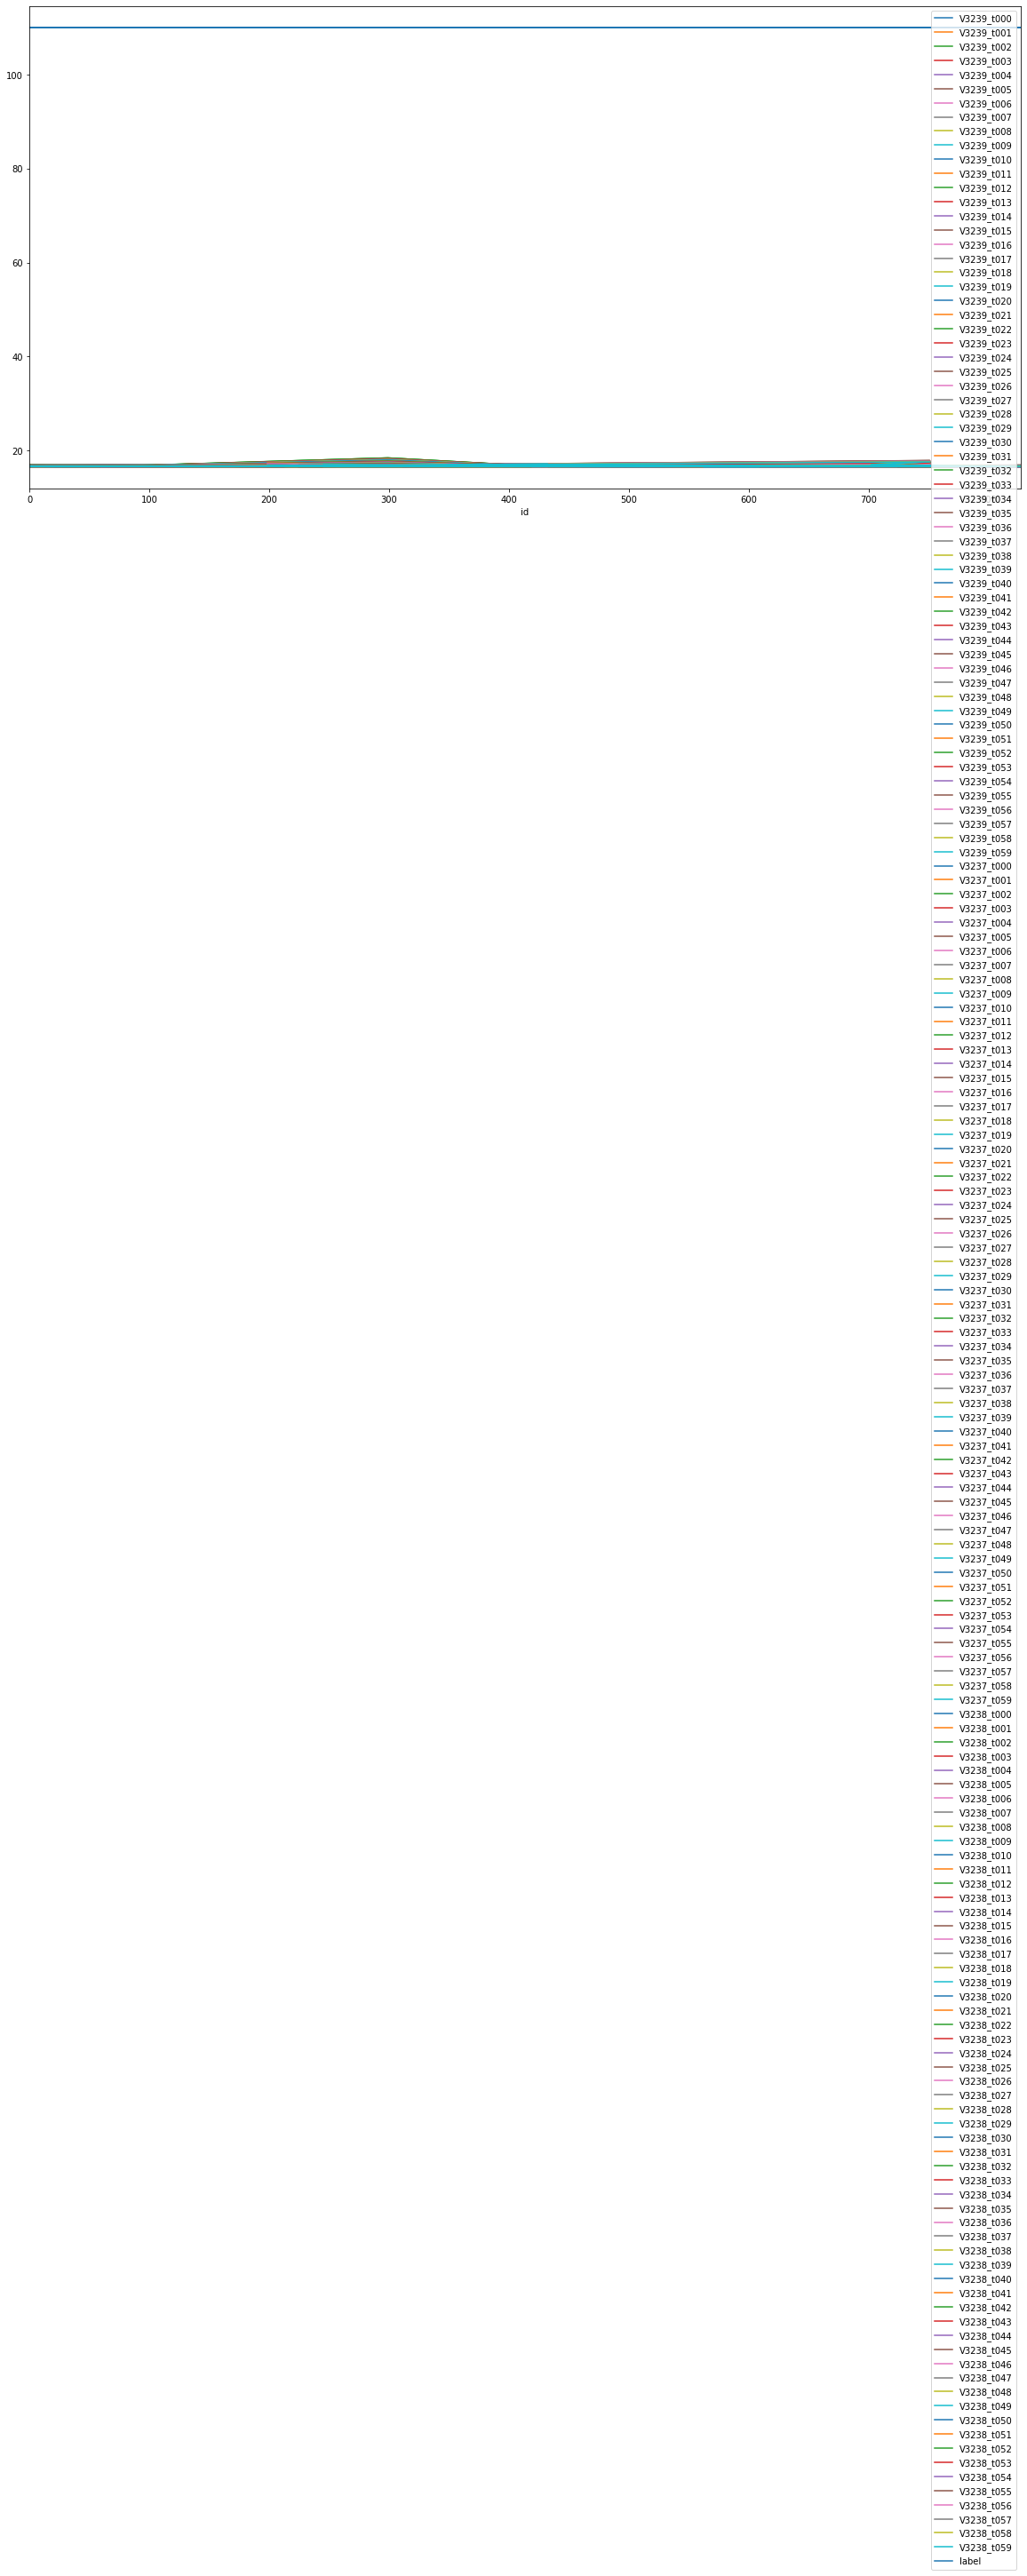

In [80]:
train[train['label'] == 110].plot.line(figsize=(20,10))

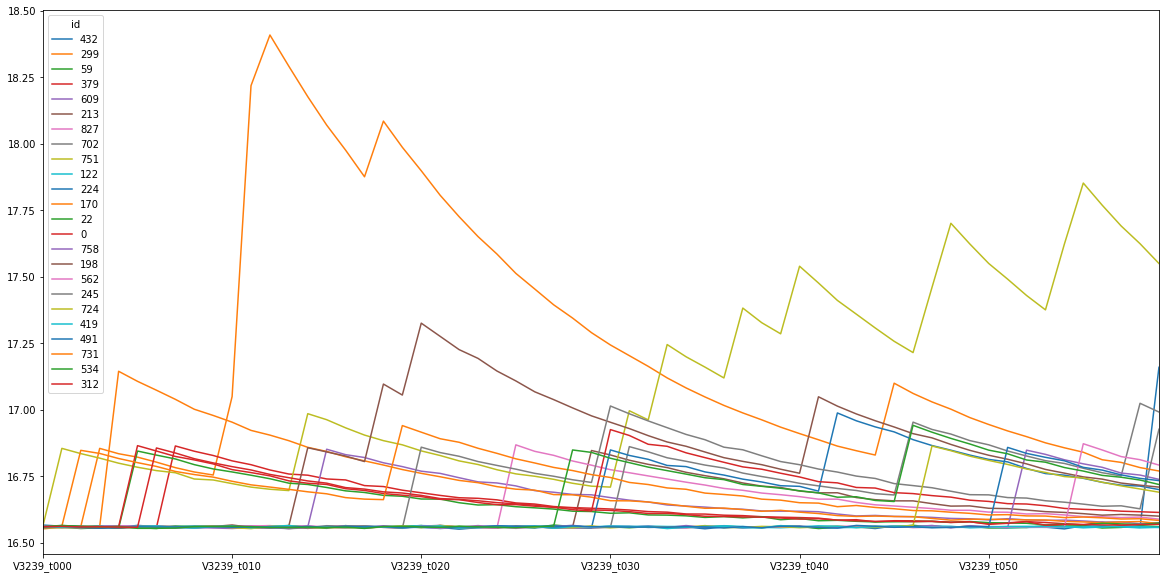

In [87]:
train[train['label'] == 110][col_3239].T.plot(figsize=(20, 10))

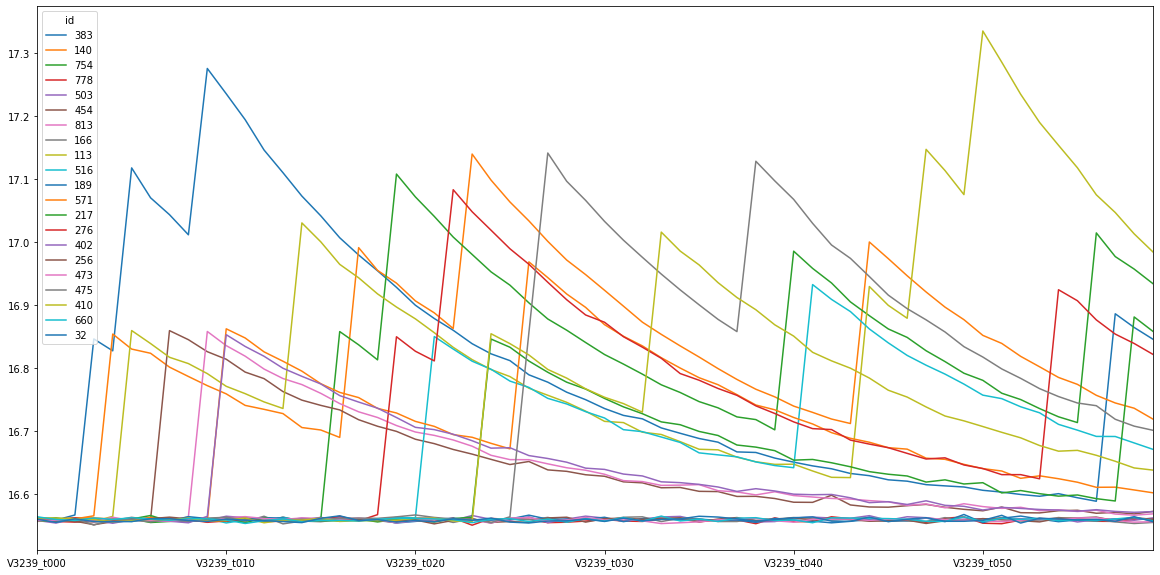

In [88]:
train[train['label'] == 17][col_3239].T.plot(figsize=(20, 10))

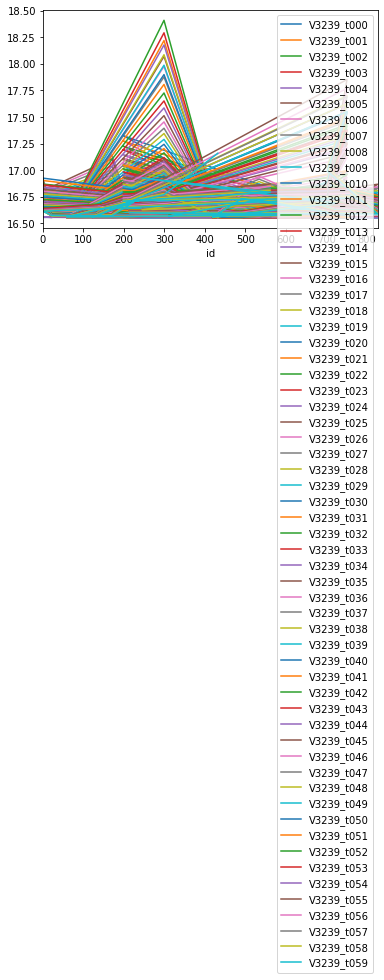

In [83]:
col_3239 = [c for c in train.columns if '3239' in c]
train[train['label'] == 110][col_3239].plot()

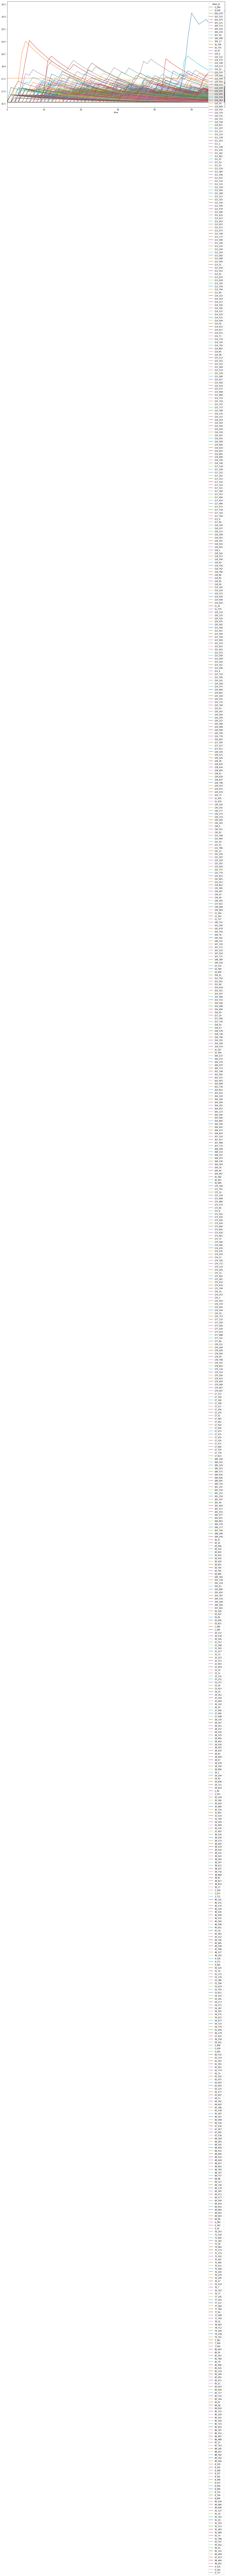

In [51]:
train.pivot('time', 'label_id', 'V3239').plot.line(figsize=(20,10))

In [34]:
train[['V3239', 'label']].pivot('label', 'V3239')

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
model

In [ ]:
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, random_state=81511991154 % 2**32-1, shuffle=True)

for train_index, valid_index in tqdm_notebook(skf.split(train.index, train['label'].values), total=n_splits, desc = 'CV'):
    X_train, X_test = train.loc[train_index, fea_cols], train.loc[valid_index, fea_cols] 
    y_train, y_test = train.loc[train_index,'label'], train.loc[valid_index, 'label']
    
    print(X_train.shape, X_test.shape)
#     print(y_train.value_counts(dropna=False))
#     print(y_test.value_counts(dropna=False))
    
    pred = model.predict(X_train)
    score = log_loss(y_train, pred)
    print(score)
    
    pred = model.predict(X_test)
    score = log_loss(y_test, pred)
    print(score)


In [ ]:
# score = log_loss(y_test, clf_probs)

In [ ]:
df_best = pd.read_csv('submit/cv10_e.csv', index_col=0)

In [ ]:
df_best.idxmax(1)

In [ ]:
# train: 30.csv (문자열 및 결측치 있음, 580개 row만 있음)

# test: 1154.csv, 1168.csv (마찬가지로 문자열 및 결측치 존재)



In [ ]:
df_label = pd.read_csv('data/train_label.csv', index_col=0)
df_label

id2label = df_label.to_dict()['label']
id2label

label2id = {}
for k, v in id2label.items():
    if v in label2id.keys():
        label2id[v].add(k)
    else:
        label2id[v] = set()
        label2id[v].add(k)

label2id

In [ ]:
df_label['label'].value_counts()

In [ ]:
for k, v in label2id.items():
    print(k, len(v))

In [ ]:
df = pd.read_csv('data/train/30.csv')#, dtype=np.float32)
df

In [ ]:
df = pd.read_csv('data/test/1154.csv')#, dtype=np.float32)
for c in df.select_dtypes(include='object').columns:
    print(c)
    print(df[c].value_counts(dropna=False))
df

In [ ]:
for c in df.select_dtypes(include='object').columns:
    print(c)
    print(df[c].value_counts(dropna=False))
    
    print('60')
    print(df_60[c].value_counts(dropna=False))
    
    print()

In [ ]:
df.info()

In [ ]:
for c in df.select_dtypes(include='object').columns:
    print(df_60.groupby([c,'label']).size())

In [ ]:
label2id[73]

In [ ]:
df_60.groupby(['V0019','label']).size()

In [ ]:
for c in df.select_dtypes(include='object').columns:
    print(c)
    print(df[c].value_counts(dropna=False))
    
    print('60')
    print(df_60[c].value_counts(dropna=False))
    
    print()

In [ ]:
df = pd.read_csv('data/test/1154.csv')#, dtype=np.float32)
df

In [ ]:
df = pd.read_csv('data/test/1168.csv')#, dtype=np.float32)
df

In [ ]:
df_60 = joblib.load('data/df_train_10_60.pkl')

In [ ]:
df_60.info()

In [ ]:
dim_dict = {}
for d in range(20):
    cols = []
    for c in df_60.columns:
        if len(df_60[c].unique()) == d:
            cols.append(c)
    
    print('dim:', d, len(cols))
    dim_dict[d] = cols
    

In [ ]:
for c in dim_dict[5]:
    print(c)
    print(df_60[c].value_counts(dropna=False))